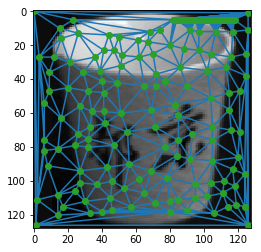

In [16]:
from matplotlib import pyplot as plt

from skimage.io import imread
from skimage.feature import corner_harris, corner_subpix, corner_peaks, peak_local_max, corner_fast
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

image = imread("cup_0.png", as_grey='True')


points = peak_local_max(corner_harris(image), min_distance=4,exclude_border=False)
#points = peak_local_max(corner_harris(image), min_distance=2)
#coords_subpix = corner_subpix(image, coords, window_size=13)

tri = Delaunay(points)
imgplot = plt.imshow(image,cmap='gray')
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()
#coords = peak_local_max(corner_harris(image), min_distance=2)
#coords_subpix = corner_subpix(image, coords, window_size=13)
#print(points)
#fig, ax = plt.subplots()
#ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
#ax.plot(points[:, 0], points[:, 1], '.b', markersize=3)
#ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
#ax.axis((0, 350, 350, 0))
#plt.show()

/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/lib/python3/dist-packages/matplotlib/__init__.py:919: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/lib/python3/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


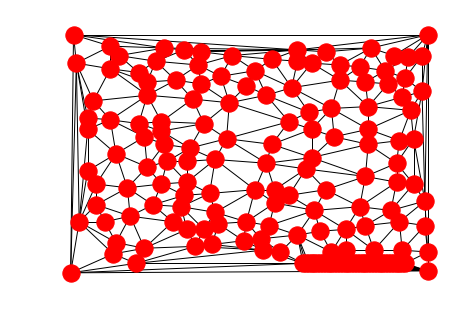

9


In [17]:
import networkx as nx
import numpy as np

# create a set for edges that are indexes of the points
edges = set()
# for each Delaunay triangle
for n in range(tri.nsimplex):
    # for each edge of the triangle
    # sort the vertices
    # (sorting avoids duplicated edges being added to the set)
    # and add to the edges set
    edge = sorted([tri.vertices[n,0], tri.vertices[n,1]])
    edges.add((edge[0], edge[1]))
    edge = sorted([tri.vertices[n,0], tri.vertices[n,2]])
    edges.add((edge[0], edge[1]))
    edge = sorted([tri.vertices[n,1], tri.vertices[n,2]])
    edges.add((edge[0], edge[1]))
# make a graph based on the Delaunay triangulation edges

graph = nx.Graph(list(edges))
#print(graph.edges())

# --------------------------------------

# plot graph
import matplotlib.pyplot as plt
pointIDXY = dict(zip(range(len(points)), points))
nx.draw(graph, pointIDXY)
plt.show() 

print(nx.diameter(graph))

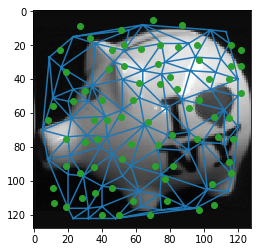

In [3]:
from matplotlib import pyplot as plt

from skimage.io import imread
from skimage.feature import corner_harris, corner_subpix, corner_peaks, peak_local_max
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

image = imread("Toy.png", as_grey='True')

points= peak_local_max(corner_harris(image), min_distance=5)

tri = Delaunay(points)

imgplot = plt.imshow(image,cmap='gray')
plt.triplot(points[:,1], points[:,0], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

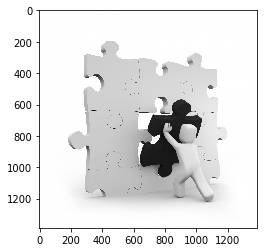

In [26]:
imgplot = plt.imshow(image,cmap='gray')
plt.show()p

In [24]:
print(tri)

AttributeError: 'NoneType' object has no attribute 'todense'

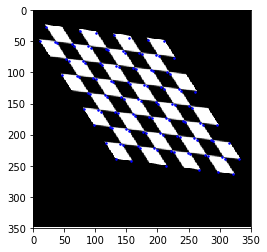

In [57]:
from skimage import feature

from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform


tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape=(350, 350))

coords = corner_peaks(corner_harris(image), min_distance=2)
coords_subpix = corner_subpix(image, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
#ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 350, 350, 0))
plt.show()

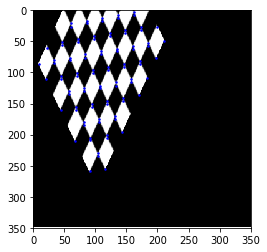

In [77]:
check = data.checkerboard()
#check[::2, 1::2] = 0.1
tform = AffineTransform(scale=(1.3, 1.1), rotation=2, shear=0.7,
                        translation=(210, 50))
image = warp(check, tform.inverse, output_shape=(350, 350))

coords = corner_peaks(corner_harris(image), min_distance=2)
coords_subpix = corner_subpix(image, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
#ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 350, 350, 0))
plt.show()

In [20]:
from matplotlib import pyplot as plt
from scipy.misc import imsave
from skimage.io import imread
from skimage.feature import corner_harris, corner_subpix, corner_peaks, peak_local_max
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import random_walker

image = imread("Toy.png", as_grey='True')
b = np.zeros_like(image)
b[0, 0] = 0  # Marker for first phase
b[80,80] = 0
b[60, 60] = 1  # Marker for second phase
data = random_walker(image, b)
imsave('gradient.png', data)

In [24]:
image[120,120]

0.098039215686274495

In [21]:
imgplot = plt.imshow('gradient.png',cmap='gray')
plt.show()

TypeError: Image data can not convert to float

In [5]:
!pip install opencv-python

  Using cached opencv_python-3.4.0.12-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached numpy-1.14.2-cp27-cp27mu-manylinux1_x86_64.whl


In [1]:
import cv2